# Solving the XOR Problem with a Multilayer Neural Network

---

This notebook implements a classic machine learning exercise—**Solving the XOR Classification Problem**—which is a key demonstration in **Chapter 13: Going Deeper – The Mechanics of PyTorch**. The XOR problem is a perfect illustration of why a **Multilayer Perceptron (MLP)** is required, as a simple single-layer model cannot solve this **non-linearly separable** task.

### Key Chapter 13 Topics Demonstrated:

1.  **Non-Linear Separability:**
    * The notebook starts by generating and visualizing the **XOR dataset** (exclusive OR). This simple 2-feature dataset is shown to be impossible to separate with a single straight line, motivating the need for deep learning. 
2.  **Multilayer Network Architecture:**
    * A **Multilayer Neural Network** model is defined, featuring a hidden layer and non-linear activation functions (like ReLU or Tanh). The introduction of this hidden layer is the mechanism that allows the model to learn the complex, non-linear decision boundary needed for XOR.
3.  **End-to-End Training Loop (Advanced):**
    * The notebook performs a complete training and validation cycle, utilizing:
        * **Tensors** for data.
        * A custom **`Dataset`** or `TensorDataset` for packaging the XOR data.
        * **`DataLoader`** for batch processing.
        * A **Classification Loss Function** (e.g., `nn.BCEWithLogitsLoss`) and an **Optimizer** (e.g., `optim.Adam`).
    * The training loop tracks and records both **training and validation loss** and **accuracy** over epochs.
4.  **Performance Visualization:**
    * **Loss and Accuracy History:** Charts are generated to visualize how the training and validation loss and accuracy evolve over time, allowing for analysis of convergence and overfitting.
    * **Decision Region Plotting:** Crucially, the final visualization plots the **model's decision regions** against the XOR data points. This visually proves that the multilayer network has successfully learned the complex, diagonal boundary required to correctly classify the XOR problem.

This notebook serves as the first fully working example in Chapter 13 that requires a deep learning architecture to succeed, solidifying the importance of hidden layers and non-linearities in complex data classification.

In [1]:
import torch
from torch import nn, optim
import numpy as np
import matplotlib.pyplot as plt

In [10]:
torch.manual_seed(1)
np.random.seed(1)
x = np.random.uniform(low= -1, high= 1, size= (200, 2))
y = np.ones(len(x))

In [11]:
y[x[:, 0] * x[:, 1]<0] = 0

In [12]:
n_train = 100
x_train = torch.tensor(x[:n_train], dtype= torch.float32)
y_train = torch.tensor(y[:n_train], dtype= torch.float32)
x_valid = torch.tensor(x[n_train:], dtype= torch.float32)
y_valid = torch.tensor(y[n_train:], dtype= torch.float32)

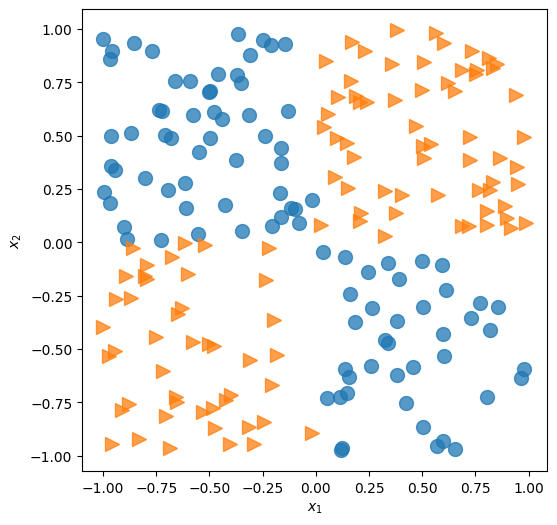

In [12]:
fig = plt.figure(figsize= (6, 6))
plt.plot(x[y == 0, 0], x[y == 0, 1], 'o', alpha= 0.75, markersize= 10)
plt.plot(x[y == 1, 0], x[y == 1, 1], '>', alpha= 0.75, markersize= 10)
plt.xlabel('$x_1$', fontsize= 10)
plt.ylabel('$x_2$', fontsize= 10)
plt.show()

In [13]:
model = nn.Sequential(
    nn.Linear(2, 1),
    nn.Sigmoid()
)
model

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)

In [14]:
loss_fn = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr= 0.001)

In [13]:
from torch.utils.data import DataLoader, TensorDataset
train_ds = TensorDataset(x_train, y_train)
torch.manual_seed(1)
BATCH_SIZE = 2
train_dl = DataLoader(train_ds, batch_size= BATCH_SIZE, shuffle= True)

In [17]:
torch.manual_seed(1)
num_epochs = 200
def train(model, num_epochs, train_dl, x_valid, y_valid):
    loss_hist_train = [0] * num_epochs
    accuracy_hist_train = [0] * num_epochs
    loss_hist_valid = [0] * num_epochs
    accuracy_hist_valid = [0] * num_epochs
    for epoch in range(num_epochs):
        model.train()
        for x_batch, y_batch in train_dl:

            pred = model(x_batch)[:, 0]
            loss = loss_fn(pred, y_batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            loss_hist_train[epoch] += loss.item()
            is_correct = ((pred>=0.5).float() == y_batch).float()
            accuracy_hist_train[epoch] += is_correct.mean()
        loss_hist_train[epoch] /= n_train / BATCH_SIZE
        accuracy_hist_train[epoch] /= n_train / BATCH_SIZE
        
        model.eval()
        with torch.no_grad():
            pred = model(x_valid)[:, 0]
            loss = loss_fn(pred, y_valid)
            loss_hist_valid[epoch] = loss.item()
            is_correct = ((pred>=0.5).float() == y_valid).float()
            accuracy_hist_valid[epoch] += is_correct.mean()
    return loss_hist_train, loss_hist_valid, \
           accuracy_hist_train, accuracy_hist_valid

In [18]:
history = train(model, num_epochs, train_dl, x_valid, y_valid)

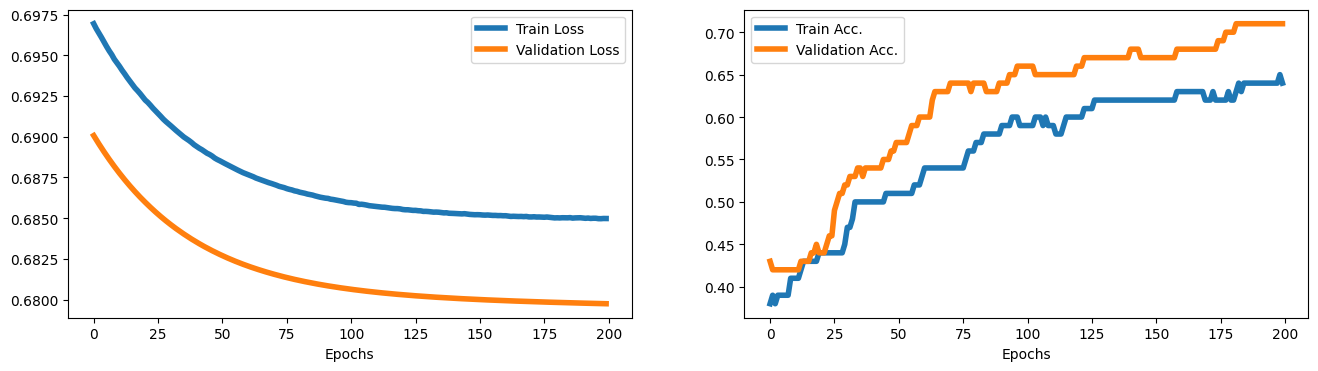

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))
axs[0].plot(history[0], lw= 4)
axs[0].plot(history[1], lw= 4)
axs[0].set_xlabel('Epochs', size= 10)
axs[0].legend(['Train Loss', 'Validation Loss'], fontsize= 10)
axs[1].plot(history[2], lw= 4)
axs[1].plot(history[3], lw= 4)
axs[1].set_xlabel('Epochs', size= 10)
axs[1].legend(['Train Acc.', 'Validation Acc.'], fontsize= 10)
plt.show()

In [20]:
model = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)
model

Sequential(
  (0): Linear(in_features=2, out_features=4, bias=True)
  (1): ReLU()
  (2): Linear(in_features=4, out_features=1, bias=True)
  (3): Sigmoid()
)

In [21]:
loss_fn = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr= 0.015)

In [22]:
history = train(model, num_epochs, train_dl, x_valid, y_valid)

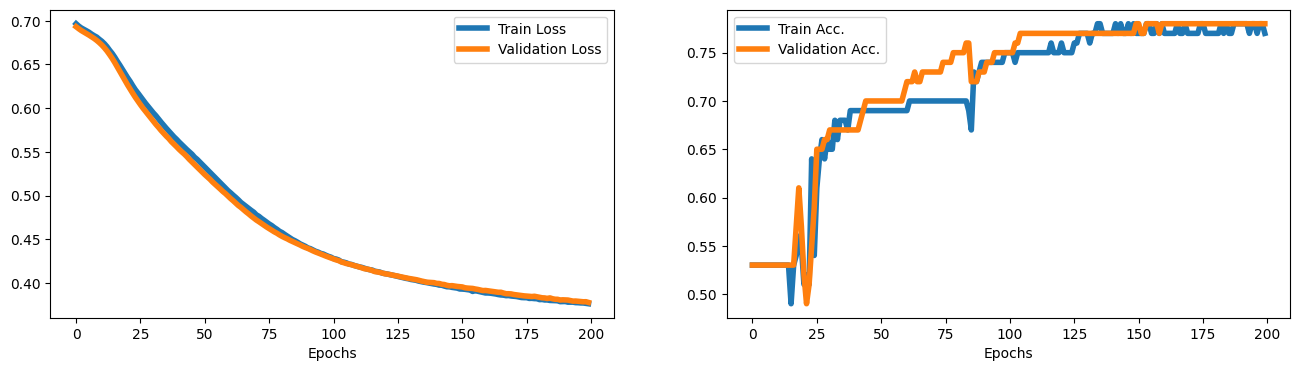

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))
axs[0].plot(history[0], lw= 4)
axs[0].plot(history[1], lw= 4)
axs[0].set_xlabel('Epochs', size= 10)
axs[0].legend(['Train Loss', 'Validation Loss'], fontsize= 10)
axs[1].plot(history[2], lw= 4)
axs[1].plot(history[3], lw= 4)
axs[1].set_xlabel('Epochs', size= 10)
axs[1].legend(['Train Acc.', 'Validation Acc.'], fontsize= 10)
plt.show()

In [24]:
model = nn.Sequential(
    nn.Linear(2, 4),
    nn.ReLU(),
    nn.Linear(4, 4),
    nn.ReLU(),
    nn.Linear(4, 1),
    nn.Sigmoid()
)

In [25]:
loss_fn = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr= 0.015)

In [26]:
history = train(model, num_epochs, train_dl, x_valid, y_valid)

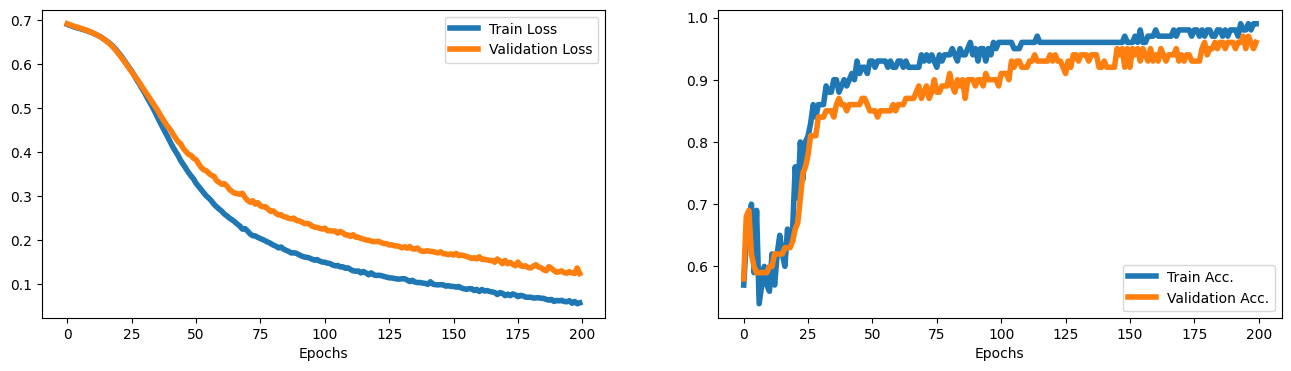

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))
axs[0].plot(history[0], lw= 4)
axs[0].plot(history[1], lw= 4)
axs[0].set_xlabel('Epochs', size= 10)
axs[0].legend(['Train Loss', 'Validation Loss'], fontsize= 10)
axs[1].plot(history[2], lw= 4)
axs[1].plot(history[3], lw= 4)
axs[1].set_xlabel('Epochs', size= 10)
axs[1].legend(['Train Acc.', 'Validation Acc.'], fontsize= 10)
plt.show()

In [39]:
class MyModule(nn.Module):
    def __init__(self):
        super().__init__()
        l1 = nn.Linear(2, 4)
        a1 = nn.ReLU()
        l2 = nn.Linear(4, 4)
        a2 = nn.ReLU()
        l3 = nn.Linear(4, 1)
        a3 = nn.Sigmoid()
        l = [l1, a1, l2, a2, l3, a3]
        self.module_list = nn.ModuleList(l)
    def forward(self, x):
        for f in self.module_list:
            x = f(x)
        return x
    def predict(self, x):
        x = torch.tensor(x, dtype= torch.float32)
        pred = self.forward(x)[:, 0]
        return(pred >= 0.5).float()

In [40]:
model = MyModule()
model

MyModule(
  (module_list): ModuleList(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=4, bias=True)
    (3): ReLU()
    (4): Linear(in_features=4, out_features=1, bias=True)
    (5): Sigmoid()
  )
)

In [41]:
loss_fn = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr= 0.015)
history = train(model, num_epochs, train_dl, x_valid, y_valid)

C:\Users\98922\AppData\Local\Temp\ipykernel_29712\960614043.py:14: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  y= y_valid.numpy().astype(np.integer),


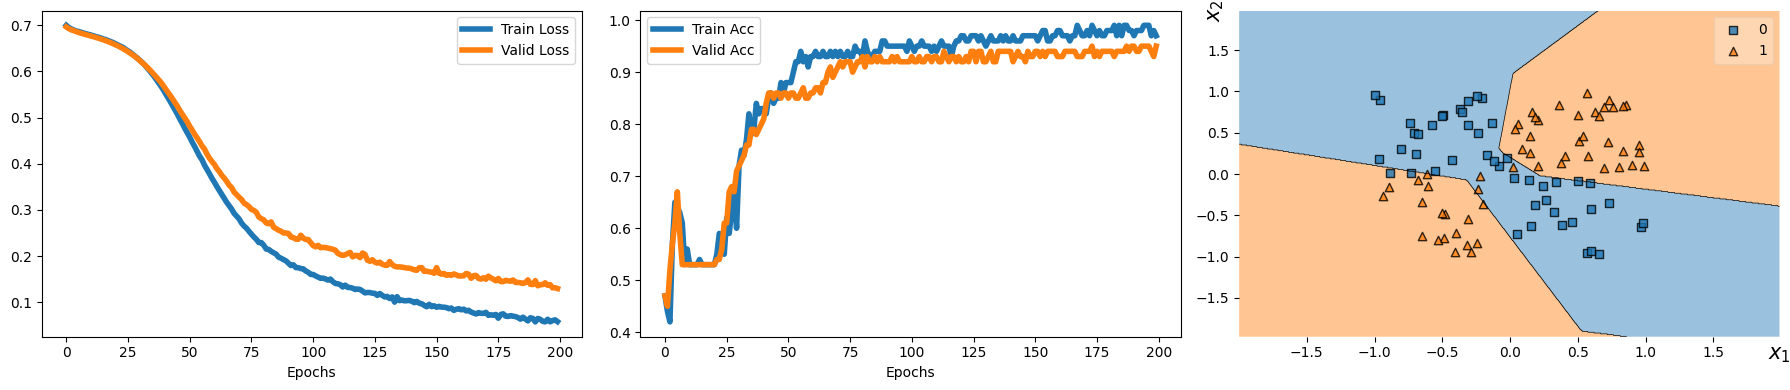

In [43]:
from mlxtend.plotting import plot_decision_regions
fig, axs = plt.subplots(1, 3, figsize= (18, 4))
axs[0].plot(history[0], lw= 4)
axs[0].plot(history[1], lw= 4)
axs[0].set_xlabel('Epochs', size= 10)
axs[0].legend(['Train Loss', 'Valid Loss'], fontsize= 10)

axs[1].plot(history[2], lw= 4)
axs[1].plot(history[3], lw= 4)
axs[1].set_xlabel('Epochs', size= 10)
axs[1].legend(['Train Acc', 'Valid Acc'], fontsize= 10)

plot_decision_regions(X= x_valid.numpy(),
                      y= y_valid.numpy().astype(np.integer),
                      clf= model,
                      ax= axs[2])
axs[2].set_xlabel('$x_1$', size= 15)
axs[2].set_ylabel('$x_2$', size= 15)
axs[2].xaxis.set_label_coords(1, -0.025)
axs[2].yaxis.set_label_coords(-0.025, 1)

plt.tight_layout()
plt.show()

In [7]:
class NoisyLinear(nn.Module):
    def __init__(self, input_size, output_size, noise_stddev= 0.1):
        super().__init__()
        w = torch.Tensor(input_size, output_size)
        self.w = nn.Parameter(w)
        nn.init.xavier_normal_(self.w)
        b = torch.Tensor(output_size).fill_(0)
        self.b = nn.Parameter(b)
        self.noise_stddev = noise_stddev
    def forward(self, x, training= False):
        if training:
            noise = torch.normal(0.0, self.noise_stddev, x.shape)
            x_new = torch.add(x, noise)
        else:
            x_new = x
        
        return torch.add(torch.mm(x_new, self.w), self.b)

In [8]:
torch.manual_seed(1)
x = torch.zeros((1, 4))
noisy_linear = NoisyLinear(4, 2)
print(noisy_linear(x, training= True))
print(noisy_linear(x, training= True))
print(noisy_linear(x, training= False))

tensor([[-0.0128, -0.0288]], grad_fn=<AddBackward0>)
tensor([[-0.0454, -0.0358]], grad_fn=<AddBackward0>)
tensor([[0., 0.]], grad_fn=<AddBackward0>)


In [15]:
class MyNoisyModule(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = NoisyLinear(2, 4, 0.07)
        self.a1 = nn.ReLU()
        self.l2 = nn.Linear(4, 4)
        self.a2 = nn.ReLU()
        self.l3 = nn.Linear(4, 1)
        self.a3 = nn.Sigmoid()
    def forward(self, x, training= False):
        x = self.l1(x, training)
        x = self.a1(x)
        x = self.l2(x)
        x = self.a2(x)
        x = self.l3(x)
        x = self.a3(x)
        return x
    def predict(self, x):
        x = torch.tensor(x, dtype= torch.float32)
        pred = self.forward(x)[:, 0]
        return (pred >= 0.5).float()

In [16]:
model = MyNoisyModule()
model

MyNoisyModule(
  (l1): NoisyLinear()
  (a1): ReLU()
  (l2): Linear(in_features=4, out_features=4, bias=True)
  (a2): ReLU()
  (l3): Linear(in_features=4, out_features=1, bias=True)
  (a3): Sigmoid()
)

In [17]:
loss_fn = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr= 0.015)
num_epochs = 200
torch.manual_seed(1)
loss_hist_train = [0] * num_epochs
loss_hist_val = [0] * num_epochs
acc_hist_train = [0] * num_epochs
acc_hist_val = [0] * num_epochs
for epoch in range(num_epochs):
    model.train()
    for x_batch, y_batch in train_dl:
        pred = model(x_batch, True)[:, 0]
        loss = loss_fn(pred, y_batch)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        loss_hist_train[epoch] += loss.item()
        is_correct = ((pred >= 0.5).float() == y_batch).float()
        acc_hist_train[epoch] += is_correct.mean()
    loss_hist_train[epoch] /= n_train / BATCH_SIZE
    acc_hist_train[epoch] /= n_train / BATCH_SIZE
    model.eval()
    with torch.no_grad():
        pred = model(x_valid, True)[:, 0]
        loss = loss_fn(pred, y_valid)
        loss_hist_val[epoch] += loss.item()
        is_correct = ((pred >= 0.5).float() == y_valid).float()
        acc_hist_val[epoch] += is_correct.mean()

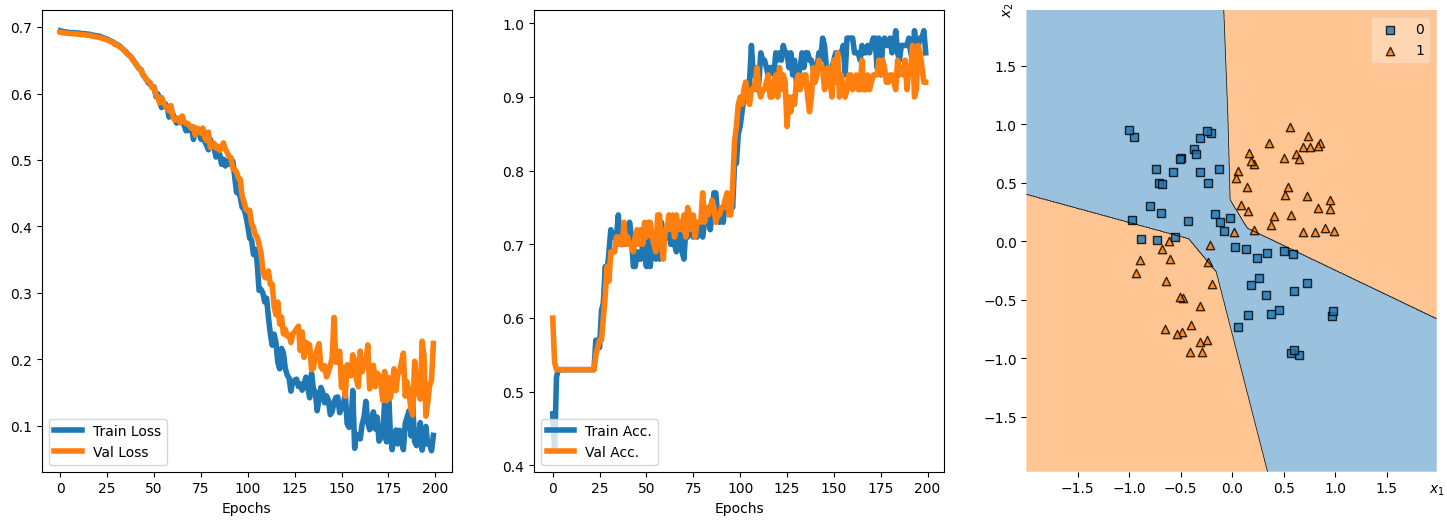

In [18]:
from mlxtend.plotting import plot_decision_regions
fig, axs = plt.subplots(1, 3, figsize= (18, 6))
axs[0].plot(loss_hist_train, lw= 4)
axs[0].plot(loss_hist_val, lw= 4)
axs[0].set_xlabel('Epochs', size= 10)
axs[0].legend(['Train Loss', 'Val Loss'], fontsize= 10, loc= 'lower left')

axs[1].plot(acc_hist_train, lw= 4)
axs[1].plot(acc_hist_val, lw= 4)
axs[1].set_xlabel('Epochs', size= 10)
axs[1].legend(['Train Acc.', 'Val Acc.'], fontsize= 10, loc= 'lower left')
plot_decision_regions(X= x_valid.numpy(),
                      y= y_valid.numpy().astype(np.int32),
                      clf= model,
                      ax= axs[2])
axs[2].set_xlabel('$x_1$', size= 10)
axs[2].set_ylabel('$x_2$', size= 10)
axs[2].xaxis.set_label_coords(1, -0.025)
axs[2].yaxis.set_label_coords(-0.025, 1)

plt.show()
